# Principal Component Analysis
---

Data $D=[x_{1}, x_{2}, ..., x_{n}]$. Each $x_{i}$ is a d-dimensional vector. 
Wish to use PCA to reduce dimension to k.

1. Find the sample mean  $(u = \frac{1}{n}\sum_{i=1}^{n} x_{i})$;
2. Subtract sample mean from the data $(z_{i} = x_{i} - u)$;
3. Compute the scatter matrix $(S = \sum_{i=1}^{n} z_{i}z_{i}^{t})$; 
4. Compute eigenvectors $[e_{1}, e_{2}, ..., e_{k}]$ corresponding to the $k$ largest eigenvalues of $S$;
5. Let $[e_{1} ... e_{k}]$ be the columns of matrix $E$;
6. The desired y which is the closest approximation to X is $Y = E^t*z$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sampling data...
X = np.array([[1,2],
             [2,3],
             [3,2],
             [4,4],
             [5,4],
             [6,7],
             [7,6],
             [9,7]])

In [2]:
# Step 1
U = np.array([ X[:,0].mean(), X[:,1].mean() ])


In [3]:
# Step 2
Z = X - U
Z

array([[-3.625, -2.375],
       [-2.625, -1.375],
       [-1.625, -2.375],
       [-0.625, -0.375],
       [ 0.375, -0.375],
       [ 1.375,  2.625],
       [ 2.375,  1.625],
       [ 4.375,  2.625]])

In [4]:
# Step 3
S = (X.shape[0]-1) * np.cov(Z.T)
#S= np.cov(Z.T)
S

array([[ 49.875,  35.125],
       [ 35.125,  29.875]])

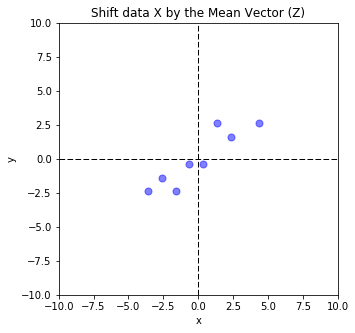

In [12]:
line = dict(linewidth=1, linestyle='--', color='k')
marker = dict(linestyle='none', marker='o', markersize=7, color='blue', alpha=0.5)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(Z[:,0], Z[:,1], **marker)
ax.axhline(**line)
ax.axvline(**line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(u'Shift data X by the Mean Vector (Z)')
_ = ax.axis([-10, 10, -10, 10])

plt.show()

In [14]:
# Step 4 = det(Sigma - h*1|)
U, eigenvalues, eigenvectors = np.linalg.svd(S)

# *** Autovetores são as componentes principais
# Normalizando os autovalores
####### (eigenvalues - min(eigenvalues)) / (max(eigenvalues) - min(eigenvalues))

pc = eigenvectors[1] / eigenvectors[0]
#eigenvectors[1] / eigenvectors[0]
#pc

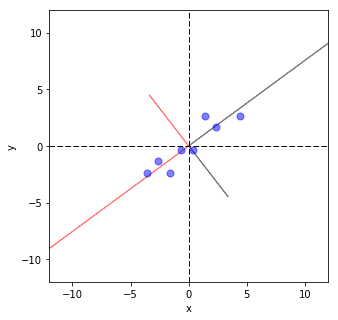

In [15]:
# Plotting the 'principal components'
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(Z[:, 0], Z[:, 1], **marker)
ax.set_xlim([-12, 12])
ax.set_ylim([-12, 12])
ax.axhline(**line)
ax.axvline(**line)
ax.set_xlabel('x')
ax.set_ylabel('y')

arrowprops = dict(width=0.01, head_width=0.05, alpha = 0.5,
                  length_includes_head=False)
a1 = ax.arrow(0, 0, eigenvalues[0], pc[0] * eigenvalues[0],
              color='k', **arrowprops)
a2 = ax.arrow(0, 0, eigenvalues[1], pc[1] * eigenvalues[1],
              color='k', **arrowprops)
a3 = ax.arrow(0, 0, -eigenvalues[0], -pc[0] * eigenvalues[0],
              color='r', **arrowprops)
a4 = ax.arrow(0, 0, -eigenvalues[1], -pc[1] * eigenvalues[1],
              color='r', **arrowprops)

plt.show()

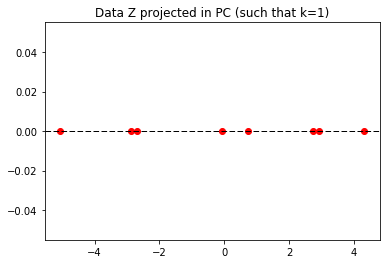

In [17]:
# Step 5 and 6

# Maxvalue Lambda (autovalue)
idxMax = np.argmax(eigenvalues)
e1 = np.array([eigenvectors[idxMax, :]]).T

# Components projection
Y = np.dot(e1.T, Z.T)
Y

# Plotting...
fig, axx = plt.subplots()
axx.plot(Y, np.zeros((1,Y.shape[1]), dtype=np.int), 'ro') 
axx.axhline(**line)
_ = axx.set_title('Data Z projected in PC (such that k=1)')
plt.show()